<a href="https://colab.research.google.com/github/zerotodeeplearning/ztdl-masterclasses/blob/master/solutions_do_not_open/Real_World_ML_Ads_Classification_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Real World ML Ads Classification

## Exercise 1: Get the data

Original Dataset from: https://www.kaggle.com/overflow012/playing-with-ads

Mirrored for convenience at https://archive.org/download/playing-with-ads/playing-with-ads.zip


catid: it's category of ads. Possible values:
- 2 = Jobs
- 3 = Real Estate

subcatid: it's the subcategory of ads. Possibles values:
- 2 = Apartment House for sale
- 11 = Lawyers
- 12 = Administrative - Secretary
- 14 = Call cente
- 15 = Building
- 16 = Accounting finance
- 17 = Education - Teachers
- 19 = Customer Support
- 20 = Bar and Restaurant
- 21 = Biotechnology
- 22 = Retail
- 23 = Technical support
- 24 = Work from home
- 26 = Transport
- 27 = Medicine - Health
- 28 = fashion
- 29 = Advertising - Marketing
- 30 = Human Resources
- 31 = Public relations
- 32 = Sellers
- 33 = Engineers - Architects
- 34 = software
- 35 = Wholesales
- 51 = Apartment - House for rent
- 122 = Other offers
- 132 = Travels and tourism
- 134 = Administration - Executives


Use your knowledge of shell commands to download and unzip the dataset. (Hint: to pass a command to the shell use `!`)

In [1]:
!wget https://archive.org/download/playing-with-ads/playing-with-ads.zip

--2020-07-28 00:13:07--  https://archive.org/download/playing-with-ads/playing-with-ads.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801402.us.archive.org/29/items/playing-with-ads/playing-with-ads.zip [following]
--2020-07-28 00:13:07--  https://ia801402.us.archive.org/29/items/playing-with-ads/playing-with-ads.zip
Resolving ia801402.us.archive.org (ia801402.us.archive.org)... 207.241.228.142
Connecting to ia801402.us.archive.org (ia801402.us.archive.org)|207.241.228.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55453774 (53M) [application/zip]
Saving to: ‘playing-with-ads.zip.1’

playing-with-ads.zi 100%[===================>]  52.88M  15.4MB/s    in 3.4s    

2020-07-28 00:13:11 (15.4 MB/s) - ‘playing-with-ads.zip.1’ saved [55453774/55453774]



In [2]:
!unzip playing-with-ads.zip

Archive:  playing-with-ads.zip
replace ads_en_us.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
#@title Update and load libraries
!pip install -U -q fasttext

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Exercise 2: Load the dataset

- Load the dataset into a Pandas DataFrame
- Explore it using the `.head()` and `.info()` methods

In [4]:
df = pd.read_csv('ads_en_us.csv', index_col=0)

In [5]:
df.head()

,catid,id,subcatid,value
0,2,45493,27,Overview \r\n \r\nWhy AFFIRMA Rehabilitation? ...
1,2,45499,27,Overview \r\n \r\nWhy AFFIRMA Rehabilitation? ...
2,2,45522,27,Overview:\r\n\r\nUnder general supervision by ...
3,2,45543,134,Be your own boss working under a Strong Brand ...
4,2,45545,134,Be your own boss working under a Strong Brand ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97601 entries, 0 to 1297
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   catid     97601 non-null  int64 
 1   id        97601 non-null  int64 
 2   subcatid  97601 non-null  int64 
 3   value     97601 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.7+ MB


## Exercise 3: Explore the labels

This dataset contains 2 possible labels:
- `catid`
- `subcatid`

Count the number or samples for each of the labels.
- What do you notice?
- Are the classes balanced?


In [7]:
df['catid'].value_counts()

2    95005
3     2596
Name: catid, dtype: int64

In [8]:
subcat_map = {
  2: "Apartment House for sale",
  11: "Lawyers",
  12: "Administrative - Secretary",
  14: "Call cente",
  15: "Building",
  16: "Accounting finance",
  17: "Education - Teachers",
  19: "Customer Support",
  20: "Bar and Restaurant",
  21: "Biotechnology",
  22: "Retail",
  23: "Technical support",
  24: "Work from home",
  26: "Transport",
  27: "Medicine - Health",
  28: "fashion",
  29: "Advertising - Marketing",
  30: "Human Resources",
  31: "Public relations",
  32: "Sellers",
  33: "Engineers - Architects",
  34: "software",
  35: "Wholesales",
  51: "Apartment - House for rent",
  122: "Other offers",
  132: "Travels and tourism",
  134: "Administration - Executives"
}

In [9]:
df['subcatid_name'] = df['subcatid'].map(subcat_map)
df['subcatid_name'].value_counts()

Medicine - Health              24652
Public relations               11247
software                        9275
Sellers                         9126
Engineers - Architects          8419
Other offers                    5683
Customer Support                3883
Advertising - Marketing         3762
Education - Teachers            3159
Travels and tourism             2452
Accounting finance              2421
Building                        2056
Apartment House for sale        2022
Administration - Executives     1823
Transport                       1286
Human Resources                 1203
Bar and Restaurant              1160
Administrative - Secretary      1032
Lawyers                          935
fashion                          692
Apartment - House for rent       574
Biotechnology                    360
Technical support                145
Wholesales                       107
Call cente                       101
Work from home                    24
Retail                             2
N

## Exercise 4: Ad length exploration

- Create a new variable that measures the length of an Ad in number of characters.
- Display the distribution of lengths with a histogram. Do you notice anything?
- Can we use this `ad_length` as a feature for classifiation?

In [10]:
df['ad_length'] = df['value'].apply(len)

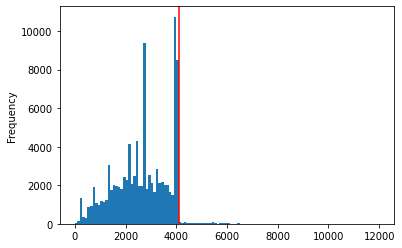

In [11]:
df['ad_length'].plot.hist(bins=120, range=(0, 12000))
plt.axvline(4100, color='red');

In [12]:
len(df[df['ad_length'] > 4100])

937

In [13]:
df[df['ad_length'] > 4100]

,catid,id,subcatid,value,subcatid_name,ad_length
4392,2,111451,122,Professional Security Officer - Stoneridge Mal...,Other offers,5970
4477,2,111629,34,If you are a Java Software Developer with expe...,software,4555
4502,2,111694,122,We are a Multifamily General Contractor who sp...,Other offers,6048
4514,2,111733,26,"SAN FRANCISCO, CA\r\n\r\nIf you are a Lead or ...",Transport,4466
4533,2,111771,122,We are a Multifamily General Contractor who sp...,Other offers,6031
...,...,...,...,...,...,...
84001,2,1924522,122,Why We Like Working for HCA\n</b><br>\nAt our ...,Other offers,5544
84002,2,1924523,122,The Behavioral Health Clinic Manager is respon...,Other offers,13015
84007,2,1924528,122,We are actively seeking experienced Applicatio...,Other offers,4524
84009,2,1924530,122,Mental Health Technician- Casual Non-Standard ...,Other offers,7526


In [14]:
df.loc[df['ad_length'] > 4100, 'subcatid_name'].value_counts()

Other offers                   264
Customer Support               198
Travels and tourism            116
Engineers - Architects          92
Bar and Restaurant              71
Accounting finance              43
Sellers                         32
Education - Teachers            24
Advertising - Marketing         24
Administration - Executives     17
Administrative - Secretary      14
Human Resources                 13
Building                         9
Transport                        6
software                         5
Lawyers                          3
Medicine - Health                2
Retail                           1
Public relations                 1
fashion                          1
Biotechnology                    1
Name: subcatid_name, dtype: int64

## Exercise 5: Naive Machine Learning

- train the model on a sample of the data with 2000 ads
- Build a simple pipeline that takes the ad and predicts the `subcatid`:
  - Use a `TfidfVectorizer` for encoding the ads. You can use the `char` analyzer with `ngram_range = (1, 3)` and `max_features=2000`.
  - Use a `LogisticRegression` model to classify them
  - Assess the score using `model.score` and `confusion_matrix`

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
docs = df['value']
y = df['subcatid']

In [17]:
docs_sample, _, y_sample, _ = train_test_split(
    docs, y, train_size=2000, random_state=0)

In [18]:
model = make_pipeline(
  TfidfVectorizer(analyzer='char', 
                  ngram_range=(1, 3),
                  max_features=2000),
  LogisticRegression(solver='liblinear')
)

In [19]:
model.fit(docs_sample, y_sample)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=2000,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

In [20]:
model.score(docs_sample, y_sample)

0.4845

In [21]:
y_pred = model.predict(docs_sample)

In [22]:
cm = confusion_matrix(y_sample, y_pred)
pd.DataFrame(cm).style.bar(color='lightgreen', )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,25,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,6,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,1,0,1,0,0,4,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,0,0,3,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,7,2,0,0,0,1,0,0
6,0,0,0,0,0,0,32,0,0,0,0,0,0,21,0,0,0,0,1,1,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,0,12,0,0,0,0,15,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,21,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,2,0,0,0,0,0,0


## Exercise 6: Ideas

Now that you've created your first model, make a list of idea of things that you could try in order to improve the model. These ideas could involve:
- data manipulation
- feature engineering
- model selection
- tooling and infrastructure

Generate at least 10 ideas.

- feature columns
- try various models (svm, xgboost, neural nets)
- data cleaning
- function for whole pipeline (tools)
- use embeddings (FastText or Glove)
- grid search on models
- grid search on vectorizer
- rebalance training data
- train test split
- cross validation
- small sample for fast train & iteration
- regularization
- learning curve for best model
- hyperparameter search for best model
...

## Exercise 7: Assessing ideas

Bucket your ideas into 3 groups:
- EASY. These should be straightforward to code if you know the API and their execution should not take more than a few minutes.
- MEDIUM. These could take a little longer to code and may take a bit more to execute. The whole experiment should be achievable within a few hours.
- HARD. These are good ideas that are time consuming, either because the implementation is not straightforward, or because decision are involved (e.g. how to impute missing data or how to better deal with outliers) or because their evaluation will take a long time.

- Make a plan of your next steps that involves doing all the easy ideas and possibly some of the medium ideas


- data cleaning => easy
- rebalance training data => easy
- function for whole pipeline (tools) => easy
- train test split => easy
- small sample for fast train & iteration => easy
- regularization => easy

----

- try various models (svm, xgboost, neural nets) => medium
- grid search on models => medium
- grid search on vectorizer => medium
- hyperparameter search for best model => medium

----

- use embeddings (FastText or Glove) => possibly long
- cross validation => not necessary for now
- learning curve for best model  => not necessary for now, we have lots of data
...

## Exercise 8: First Idea

The first idea is to notice that there are some subcategories that have very few samples, and there may be duplicate ads. Let's get rid of both.

- Create a new dataset called `dfclean` with the following properties:
  - drop all rows of categories with less than 50 ads
  - drop all duplicate ads (same `catid`, `value`, `subcatid`)
  - double check the number of ads per subcategory id

  You should get the following counts:

  ```
subcatid count
27     15699
34      8488
33      8025
122     4796
32      4553
19      3192
29      3085
132     2316
2       1997
16      1936
15      1724
31      1505
17      1173
20      1156
30      1044
134     1023
12       939
11       875
26       748
28       601
51       572
21       292
23       142
14        98
35        97
```

You can go ahead and implement your first and easiest idea or follow along and implement this one.

In [23]:
dfclean = df.drop_duplicates(subset=['catid', 'value', 'subcatid']).copy()

In [24]:
dfclean['subcatid_name'].value_counts()

Medicine - Health              15699
software                        8488
Engineers - Architects          8025
Other offers                    4796
Sellers                         4553
Customer Support                3192
Advertising - Marketing         3085
Travels and tourism             2316
Apartment House for sale        1997
Accounting finance              1936
Building                        1724
Public relations                1505
Education - Teachers            1173
Bar and Restaurant              1156
Human Resources                 1044
Administration - Executives     1023
Administrative - Secretary       939
Lawyers                          875
Transport                        748
fashion                          601
Apartment - House for rent       572
Biotechnology                    292
Technical support                142
Call cente                        98
Wholesales                        97
Work from home                     8
Retail                             2
N

In [25]:
subcat_counts = dfclean['subcatid'].value_counts()
subcat_counts

27     15699
34      8488
33      8025
122     4796
32      4553
19      3192
29      3085
132     2316
2       1997
16      1936
15      1724
31      1505
17      1173
20      1156
30      1044
134     1023
12       939
11       875
26       748
28       601
51       572
21       292
23       142
14        98
35        97
24         8
22         2
Name: subcatid, dtype: int64

In [26]:
subcats_to_drop = subcat_counts[subcat_counts < 50].index
subcats_to_drop

Int64Index([24, 22], dtype='int64')

In [27]:
dfclean = dfclean[~dfclean['subcatid'].isin(subcats_to_drop)].copy()

In [28]:
dfclean['subcatid'].value_counts()

27     15699
34      8488
33      8025
122     4796
32      4553
19      3192
29      3085
132     2316
2       1997
16      1936
15      1724
31      1505
17      1173
20      1156
30      1044
134     1023
12       939
11       875
26       748
28       601
51       572
21       292
23       142
14        98
35        97
Name: subcatid, dtype: int64

## Exercise 9: Second idea

Rebalancing data.

Let's create a training set with balanced subcategories.

- Split `dfclean` into train and test with a test size of 10000 and random state 0
- Create a new dataset `dfsampled` from `dftrain` that contains 50 samples from each subcat ide. you can use the `.sample` method with `replace=False` for this.
- Check the length of `dfsampled`, it should contain 1250 rows.

You can go ahead and implement your next idea or follow along and implement this one.

In [29]:
dftrain, dftest = train_test_split(dfclean, test_size=10000, random_state=0)

In [30]:
dftest['subcatid_name'].value_counts()

Medicine - Health              2362
software                       1273
Engineers - Architects         1243
Other offers                    706
Sellers                         706
Customer Support                478
Advertising - Marketing         465
Travels and tourism             358
Apartment House for sale        311
Accounting finance              302
Building                        244
Public relations                221
Education - Teachers            202
Bar and Restaurant              178
Human Resources                 157
Administration - Executives     154
Administrative - Secretary      139
Lawyers                         134
Transport                       102
Apartment - House for rent       86
fashion                          84
Biotechnology                    44
Technical support                20
Wholesales                       20
Call cente                       11
Name: subcatid_name, dtype: int64

In [31]:
subcatids = dftrain['subcatid'].unique()

In [32]:
n_samples = 50

dfsampled = pd.concat([dftrain[dftrain['subcatid'] == c].sample(
    n=n_samples, random_state=0, replace=False) for c in subcatids],
    axis=0)

In [33]:
dfsampled['subcatid_name'].value_counts()

Advertising - Marketing        50
Sellers                        50
Other offers                   50
software                       50
Wholesales                     50
Medicine - Health              50
Transport                      50
Lawyers                        50
Education - Teachers           50
Administration - Executives    50
Engineers - Architects         50
Building                       50
Administrative - Secretary     50
Human Resources                50
Customer Support               50
Technical support              50
Call cente                     50
Travels and tourism            50
Apartment - House for rent     50
Public relations               50
fashion                        50
Apartment House for sale       50
Accounting finance             50
Bar and Restaurant             50
Biotechnology                  50
Name: subcatid_name, dtype: int64

In [34]:
len(dfsampled)

1250

## Exercise 10: Next idea

Machine Learning on balanced data

- Train the pipeline model you defined earlier on the rebalanced data.
- Assess the performance on the test set using the accuracy score and the confusion matrix.
- Did rebalancing the data help?

You can go ahead and implement your next idea or follow along and implement this one.

In [35]:
model.fit(dfsampled['value'], dfsampled['subcatid'])

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=2000,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

In [36]:
model.score(dfsampled['value'], dfsampled['subcatid'])

0.4672

In [37]:
y_pred_test = model.predict(dftest['value'])

In [38]:
cm = confusion_matrix(dftest['subcatid'], y_pred_test)
pd.DataFrame(cm).style.bar(color='lightgreen')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,47,2,0,15,3,0,1,0,0,2,2,37,9,9,2,2,5,6,1,0,0,166,2,0,0
1,0,68,1,2,1,1,0,0,0,8,0,8,19,7,1,2,3,1,6,5,0,0,0,1,0
2,1,6,0,4,1,0,2,0,2,15,6,9,21,12,1,10,5,5,11,5,5,0,0,18,0
3,0,0,0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,18,0,1,35,1,0,0,0,36,4,30,10,12,11,8,7,11,46,6,7,0,0,1,0
5,0,17,0,35,1,22,2,2,0,36,11,26,22,33,11,8,8,19,7,6,9,0,5,19,3
6,1,4,0,5,0,0,16,0,8,19,6,16,67,13,2,1,3,10,17,6,1,0,1,6,0
7,0,4,0,9,2,0,0,46,11,10,27,62,2,21,42,2,56,61,6,4,2,0,0,110,1
8,0,0,0,1,0,0,0,0,69,0,2,1,1,12,0,0,20,0,0,0,0,0,0,72,0
9,0,0,0,1,0,0,0,0,0,18,0,3,11,2,0,1,1,0,3,3,1,0,0,0,0


It helped a little but performance is still pretty bad.

## Exercise 11: Next idea

Tools

Build some tools to make experimentation faster. Define 3 helper functions:
- 
```python
def calculate_scores(y_true, y_pred):
    """Returns the accuracy and F1 score"""
    ...
    return acc, f1
```
- 
```python
def calculate_scores_train_val(y_train, y_pred_train, y_val, y_pred_val):
    """Returns accuracy and F1 score for both training and validation sets"""
    ...
    return at, av, ft, fv
```
- 
```python
def train_val_model(model, model_name, X_train, y_train, X_val, y_val):
    """Trains and evaluates a model, return the results in a DataFrame"""
    ...
    return pd.DataFrame(results,
                        columns=[model_name],
                        index=['model',
                               'accuracy_score_train',
                               'accuracy_score_val',
                               'f1_score_train',
                               'f1_score_val',
                               'train_time', 'pred_time'])
  ```

You can go ahead and implement your next idea or follow along and implement this one. 

In [39]:
from time import time
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [40]:
def calculate_scores(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred, average='weighted')
  return acc, f1

def calculate_scores_train_val(y_train, y_pred_train, y_val, y_pred_val):
  at, ft = calculate_scores(y_train, y_pred_train)
  av, fv = calculate_scores(y_val, y_pred_val)
  return at, av, ft, fv

In [41]:
def train_val_model(model, model_name, X_train, y_train, X_val, y_val):
  t0 = time()
  model.fit(X_train, y_train)
  t1 = time()

  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)
  t2 = time()

  at, av, ft, fv = calculate_scores_train_val(y_train, y_pred_train, y_val, y_pred_val)
  results = [
    model,
    at,
    av,
    ft,
    fv,
    t1 - t0, t2 - t1
  ]
  
  return pd.DataFrame(results,
                      columns=[model_name],
                      index=['model',
                             'accuracy_score_train',
                             'accuracy_score_val',
                             'f1_score_train',
                             'f1_score_val',
                             'train_time', 'pred_time'])

## Exercise12: Next idea

Dummy Classifier

Validate your tools by evaluating a pipeline with `TfidfVectorizer` and `DummyClassifier`.

You can go ahead and implement your next idea or follow along and implement this one.

In [42]:
X_train = dfsampled['value']
y_train = dfsampled['subcatid']
X_val = dftest['value']
y_val = dftest['subcatid']

In [43]:
from sklearn.dummy import DummyClassifier

In [44]:
model = make_pipeline(
    TfidfVectorizer(analyzer='char', 
                    ngram_range=(1, 1),
                    max_features=1000),
    DummyClassifier(strategy='stratified'),
)
results = train_val_model(model, 'dummy',
                          X_train, y_train,
                          X_val, y_val)
results

,dummy
model,"(TfidfVectorizer(analyzer='char', binary=False..."
accuracy_score_train,0.0376
accuracy_score_val,0.0446
f1_score_train,0.0379295
f1_score_val,0.0540913
train_time,1.21347
pred_time,5.66779


## Exercise 13: Next idea

Regularization

Let's assess the influence of regularization strength on the model performance.

- define a variable `Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]` with a few values for regularization.
- Iterate over the regularization values and for each value assess the performance of a pipeline with:
  - 
  ```python
  TfidfVectorizer(analyzer='char', 
                  ngram_range=(1, 3),
                  max_features=1000)
  ```
  and
  - 
  ```python
  LogisticRegression(C=c, solver='liblinear')
  ```
- Accumulate the results into a `results` DataFrame

You can go ahead and implement your next idea or follow along and implement this one.

In [45]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in Cs:
  model = make_pipeline(
   TfidfVectorizer(analyzer='char', 
                   ngram_range=(1, 3),
                   max_features=1000),
    LogisticRegression(C=c, solver='liblinear')
  )
  mname = 'C_{}'.format(c)
  results[mname] = train_val_model(model, mname,
                                   X_train, y_train, X_val, y_val)
  print(c, "Done.")

0.001 Done.
0.01 Done.
0.1 Done.
1 Done.
10 Done.
100 Done.
1000 Done.


## Exercise 14: Next idea

Assess the results

Display the results using a bar plot. Which regularization gives the best performance? Use that value from now on.

You can go ahead and implement your next idea or follow along and implement this one. 

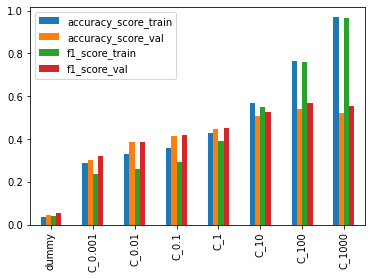

In [46]:
results.transpose()[['accuracy_score_train',
                     'accuracy_score_val',
                     'f1_score_train', 
                     'f1_score_val']].plot.bar();

## Exercise 15: Next idea

Let's assess the influence of the `ngram_range` parameter.

- Vary the `ngram_range` and keep everything else fixed.
- Set the regularization strength to `C=10`.
- Append the results to the `results` DataFrame
- Display the results for comparison

You can go ahead and implement your next idea or follow along and implement this one.

In [47]:
n_gram_range = range(1, 7)

for n in n_gram_range:
  model = make_pipeline(
   TfidfVectorizer(analyzer='char', 
                   ngram_range=(1, n),
                   max_features=1000),
    LogisticRegression(C=10, solver='liblinear')
  )
  mname = 'n_gram_{}'.format(n)
  results[mname] = train_val_model(model, mname,
                                   X_train, y_train, X_val, y_val)
  print(n, "Done.")

1 Done.
2 Done.
3 Done.
4 Done.
5 Done.
6 Done.


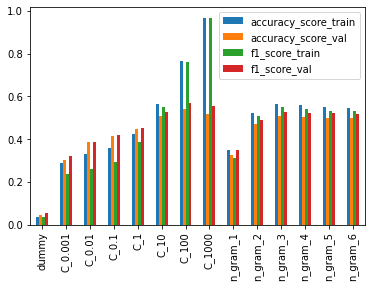

In [48]:
results.transpose()[['accuracy_score_train',
                     'accuracy_score_val',
                     'f1_score_train', 
                     'f1_score_val']].plot.bar();

## Exercise 16: Next idea

Let's assess the influence of the `max_features` parameter of the `TfidfVectorizer`.

- Set the `ngram_range=(1, 3)`
- Set the regularization strength to `C=10`.
- Append the results to the `results` DataFrame
- Display the results for comparison

You can go ahead and implement your next idea or follow along and implement this one.

In [49]:
max_features_range = [1000, 2500, 5000, 10000, 20000]

for n in max_features_range:
  model = make_pipeline(
   TfidfVectorizer(analyzer='char', 
                   ngram_range=(1, 3),
                   max_features=n),
    LogisticRegression(C=10, solver='liblinear')
  )
  mname = 'max_features_{}'.format(n)
  results[mname] = train_val_model(model, mname,
                          X_train, y_train,
                          X_val, y_val)
  print(n, "Done.")

1000 Done.
2500 Done.
5000 Done.
10000 Done.
20000 Done.


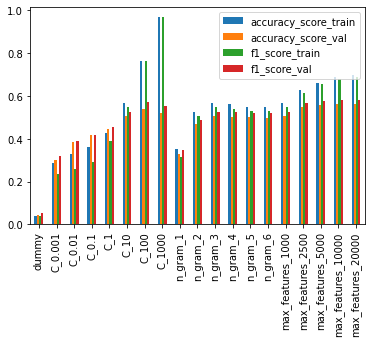

In [50]:
results.transpose()[['accuracy_score_train',
                     'accuracy_score_val',
                     'f1_score_train', 
                     'f1_score_val']].plot.bar()

## Exercise 17: Next idea

Let's change the number of minimum samples in the rebalanced dataset. In order to do this:
- create new resampled datasets with `n_samples_range = [50, 100, 200, 500, 1000]`. Use `replace=True` because sometimes more samples per class are required than available.
- Train a model with `ngram_range=(1, 3)`, `max_features=10000` and `C=10`
- Append the results to the `results` DataFrame
- Display the results for comparison

You can go ahead and implement your next idea or follow along and implement this one.

In [51]:
n_samples_range = [50, 100, 200, 500, 1000]


for n in n_samples_range:
  dfsampled = pd.concat([dftrain[dftrain['subcatid'] == c].sample(
      n=n, random_state=0, replace=True) for c in subcatids],
      axis=0)

  X_train = dfsampled['value']
  y_train = dfsampled['subcatid']
  X_val = dftest['value']
  y_val = dftest['subcatid']

  model = make_pipeline(
   TfidfVectorizer(analyzer='char', 
                   ngram_range=(1, 3),
                   max_features=10000),
    LogisticRegression(C=10, solver='liblinear')
  )
  mname = 'n_samples_{}'.format(n)
  results[mname] = train_val_model(model, mname,
                          X_train, y_train,
                          X_val, y_val)
  print(n, "Done.")

50 Done.
100 Done.
200 Done.
500 Done.
1000 Done.


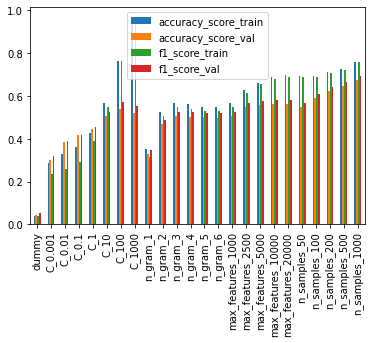

In [52]:
results.transpose()[['accuracy_score_train',
                     'accuracy_score_val',
                     'f1_score_train', 
                     'f1_score_val']].plot.bar();

## Exercise 18: Next idea

Noticing that the performance of my model keeps increasing as the number of samples goes up, let's extend the `n_samples_range` a bit further:
- Repeat the above steps with `n_samples_range = [1000, 2000, 3000]`
- Append the results to the `results` DataFrame
- Display the results for comparison

You can go ahead and implement your next idea or follow along and implement this one.

In [53]:
n_samples_range = [1000, 2000, 3000]


for n in n_samples_range:
  dfsampled = pd.concat([dftrain[dftrain['subcatid'] == c].sample(
      n=n, random_state=0, replace=True) for c in subcatids],
      axis=0)

  X_train = dfsampled['value']
  y_train = dfsampled['subcatid']
  X_val = dftest['value']
  y_val = dftest['subcatid']

  model = make_pipeline(
   TfidfVectorizer(analyzer='char', 
                   ngram_range=(1, 3),
                   max_features=20000),
    LogisticRegression(C=10, solver='liblinear')
  )
  mname = 'n_samples_{}'.format(n)
  results[mname] = train_val_model(model, mname,
                          X_train, y_train,
                          X_val, y_val)
  print(n, "Done.")

1000 Done.
2000 Done.
3000 Done.


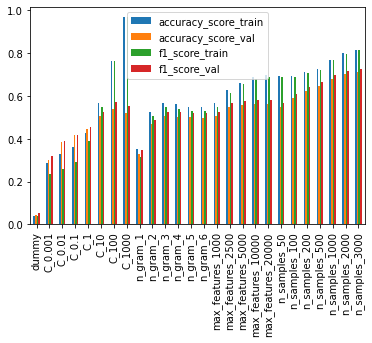

In [54]:
results.transpose()[['accuracy_score_train',
                     'accuracy_score_val',
                     'f1_score_train', 
                     'f1_score_val']].plot.bar();

### Exercise 18: BONUS

You may have noticed that the last calculations took a long time. Let's display the training and inference times for all the experiments so far.

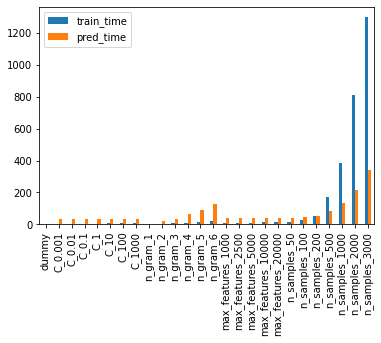

In [55]:
results.transpose()[['train_time',
                     'pred_time']].plot.bar();

## Exercise 19: Next idea

Iiterate on different models and see which one has the best performance. Feel free to implement this one or your next best idea.

To iterate on models:
- Load all the necessary model classes from `sklearn`, `xgboost`, `lightgbm`. For example, try the following:
  - Multinomial Naive Bayes
  - TruncatedSVD + XGBoost
  - TruncatedSVD + Light GBM
  - Logistic regression with C=100
  - Stochastic Gradient Descent with different lossess and different values for alpha
- Make a list of model instances and iterate:
  - Use `n_samples=1000`
  - Use `ngram_range=(1, 3)`
  - Use `max_features=20000`
  - Tran the model on the resampled data
  - Append the results to the `results` DataFrame
  - Display the results for comparison

You can go ahead and implement your next idea or follow along and implement this one.

In [56]:
from sklearn.naive_bayes import MultinomialNB
from xgboost.sklearn import XGBClassifier
from sklearn.decomposition import TruncatedSVD
from lightgbm.sklearn import LGBMClassifier
from sklearn.linear_model import SGDClassifier

In [57]:
estimators = [
              MultinomialNB(),
              make_pipeline(TruncatedSVD(algorithm='randomized', n_components=300),
                  XGBClassifier()),
              make_pipeline(TruncatedSVD(algorithm='randomized', n_components=300),
                  LGBMClassifier()),
              LogisticRegression(C=100, solver='liblinear'),
              SGDClassifier(),
              SGDClassifier(alpha=0.001),
              SGDClassifier(alpha=0.01),
              SGDClassifier(alpha=1),
              SGDClassifier(loss='squared_hinge'),
              SGDClassifier(loss='log'),
              ]

estimator_names = [
                   'multinomial_nb',
                   'svd_xgb',
                   'svd_lightgbm',
                   'log_r_C=100',
                   'sgd',
                   'sgd_al_001',
                   'sgd_al_01',
                   'sgd_al_1',
                   'sgd_sq_hng',
                   'sgd_log']

n_samples = 1000

dfsampled = pd.concat([dftrain[dftrain['subcatid'] == c].sample(
    n=n_samples, random_state=0, replace=True) for c in subcatids],
    axis=0)

X_train = dfsampled['value']
y_train = dfsampled['subcatid']
X_val = dftest['value']
y_val = dftest['subcatid']


for est, mname in zip(estimators, estimator_names):
  model = make_pipeline(
    TfidfVectorizer(analyzer='char', 
                   ngram_range=(1, 3),
                   max_features=20000),
    est
  )

  results[mname] = train_val_model(model, mname,
                          X_train, y_train,
                          X_val, y_val)
  print(mname, "Done.")

multinomial_nb Done.
svd_xgb Done.
svd_lightgbm Done.
log_r_C=100 Done.
sgd Done.
sgd_al_001 Done.
sgd_al_01 Done.
sgd_al_1 Done.
sgd_sq_hng Done.
sgd_log Done.


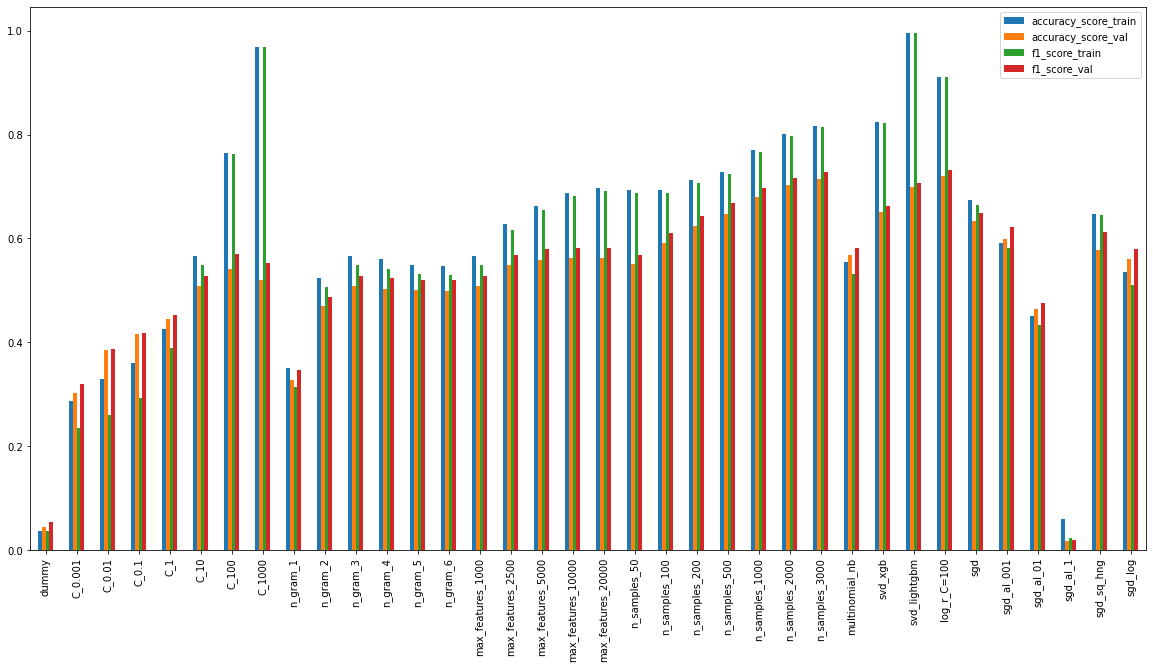

In [58]:
results.transpose()[['accuracy_score_train',
                     'accuracy_score_val',
                     'f1_score_train', 
                     'f1_score_val']].plot.bar(figsize=(20,10));

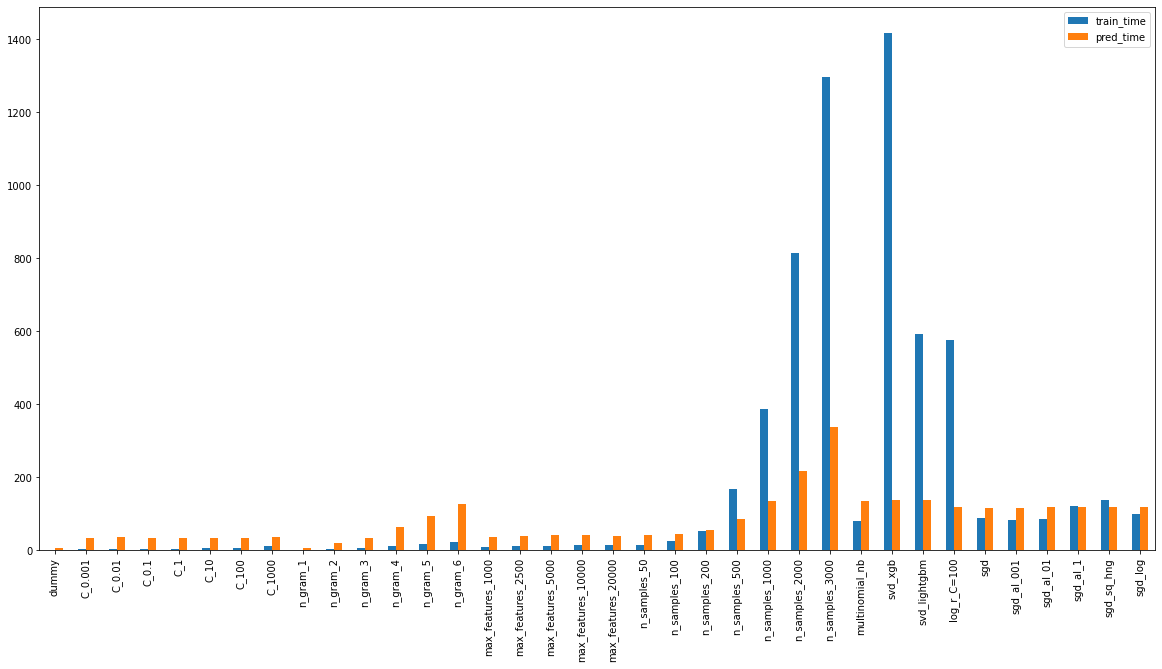

In [59]:
results.transpose()[['train_time',
                     'pred_time']].plot.bar(figsize=(20,10));

In [60]:
results.transpose().sort_values('f1_score_val', ascending=False).head()

,model,accuracy_score_train,accuracy_score_val,f1_score_train,f1_score_val,train_time,pred_time
log_r_C=100,"(TfidfVectorizer(analyzer='char', binary=False...",0.91088,0.7205,0.910206,0.732461,576.768,120.036
n_samples_3000,"(TfidfVectorizer(analyzer='char', binary=False...",0.817013,0.714,0.814586,0.727025,1297.09,338.517
n_samples_2000,"(TfidfVectorizer(analyzer='char', binary=False...",0.8006,0.7021,0.798043,0.716467,813.787,218.717
svd_lightgbm,"(TfidfVectorizer(analyzer='char', binary=False...",0.9958,0.6998,0.995802,0.706309,592.04,139.267
n_samples_1000,"(TfidfVectorizer(analyzer='char', binary=False...",0.7698,0.6804,0.767016,0.696819,387.579,134.461


## Exercise 20: Next idea

Let's use the FastText embeddings, following the method outlined [here](https://github.com/facebookresearch/fastText/tree/master/python#text-classification-model).

In order to do this, we will need to:
- save the data to a text file containing a training sentence per line along with the labels 
- labels need to be words that are prefixed by the string `__label__`
- train the model using `fasttext.train_supervised`

In order to achieve the above, we will define helper functions:
- 
```python
def clean_text(s):
    """Returns a clean string of text by:
      - lowercasing the text
      - replacing newlines with spaces
      - replacing any characters that is not alphanumeric with a space
      - condencing multiple spaces to a single space
    """
    return clean_s
```
- 
```python
def join_labels(df):
    return ('__label__'
            + df['subcatid'].astype(str) 
            + " , "
            + clean_text(df['value']))
```
- 
```python
def save_to_txt(dfin, fname):
    series = join_labels(dfin)
    with open(fname, 'w') as fout:
      fout.write('\n'.join(series.values))
```

Notice that the API of FastText is different from Scikit Learn's API, so you will have to write some glue code to compare the results.

Also, it may be worth comparing the performance of FastText when trained using the unbalanced traing set VS the rebalanced training set.

You can go ahead and implement your next idea or follow along and implement this one.

In [61]:
def clean_text(s):
  """Returns a clean string of text by:
      - lowercasing the text
      - replacing newlines with spaces
      - replacing any characters that is not alphanumeric with a space
      - condencing multiple spaces to a single space
  """
  return (s.str.lower()
          .replace(r'\n|\r',' ', regex=True)
          .replace(r'([^a-z0-9])', r' \1 ', regex=True)
          .replace(r'[ ]+', ' ', regex=True))

In [62]:
def join_labels(df):
  return ('__label__'
          + df['subcatid'].astype(str) 
          + " , "
          + clean_text(df['value']))

In [63]:
def save_to_txt(dfin, fname):
  series = join_labels(dfin)
  with open(fname, 'w') as fout:
    fout.write('\n'.join(series.values))
  print("Saved", fname)

In [64]:
save_to_txt(dftrain, 'dftrain.txt')
save_to_txt(dfsampled, 'dfsampled.txt')
save_to_txt(dftest, 'dftest.txt')

Saved dftrain.txt
Saved dfsampled.txt
Saved dftest.txt


In [65]:
import fasttext
import re

In [92]:
t0 = time()
model = fasttext.train_supervised(input="dftrain.txt", lr=1.0, epoch=25, wordNgrams=2, bucket=200000, dim=50, loss='hs')
t1 = time()

In [93]:
model.predict("This is an ad about cars and trucks")

(('__label__2',), array([0.72226524]))

In [94]:
pattern = re.compile('__label__([0-9]+) , (.*)')

In [95]:
def fasttext_predict(fname, model):
  with open(fname) as fin:
    msg = fin.read().split('\n')

  true = []
  pred = []
  for line in msg:
    l, s = pattern.findall(line)[0]
    true.append(int(l))
    pred.append(int(model.predict(s)[0][0].replace('__label__', '')))
  return true, pred

In [96]:
t2 = time()
ytt, ypt = fasttext_predict('dftrain.txt', model)
ytv, ypv = fasttext_predict('dftest.txt', model)
t3 = time()

In [97]:
fasttext_scores = calculate_scores_train_val(ytt, ypt, ytv, ypv)
fasttext_scores

(0.9515478992795492, 0.7837, 0.9509832897926767, 0.7827072649606351)

In [98]:
results['fasttext_train'] = [model] + list(fasttext_scores) + [t1 - t0, t3 - t2]

In [99]:
t0 = time()
model_sampled = fasttext.train_supervised(input="dfsampled.txt", lr=1.0, epoch=25, wordNgrams=2, bucket=200000, dim=50, loss='hs')
t1 = time()

In [100]:
t2 = time()
ytts, ypts = fasttext_predict('dfsampled.txt', model_sampled)
ytvs, ypvs = fasttext_predict('dftest.txt', model_sampled)
t3 = time()

In [101]:
fasttext_scores_sampled = calculate_scores_train_val(ytts, ypts, ytvs, ypvs)
fasttext_scores_sampled

(0.11728, 0.0412, 0.07207875761262314, 0.04227168110362161)

In [102]:
results['fasttext_sampled'] = [model_sampled] + list(fasttext_scores_sampled) + [t1 - t0, t3 - t2]

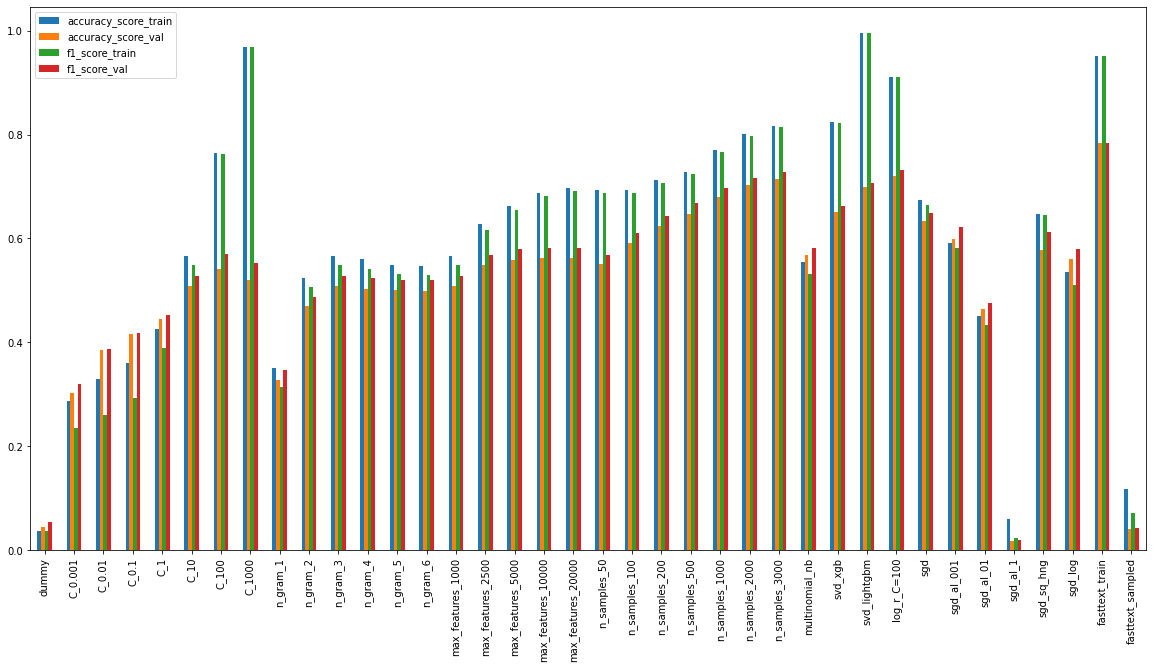

In [103]:
results.transpose()[['accuracy_score_train',
                     'accuracy_score_val',
                     'f1_score_train', 
                     'f1_score_val']].plot.bar(figsize=(20,10));

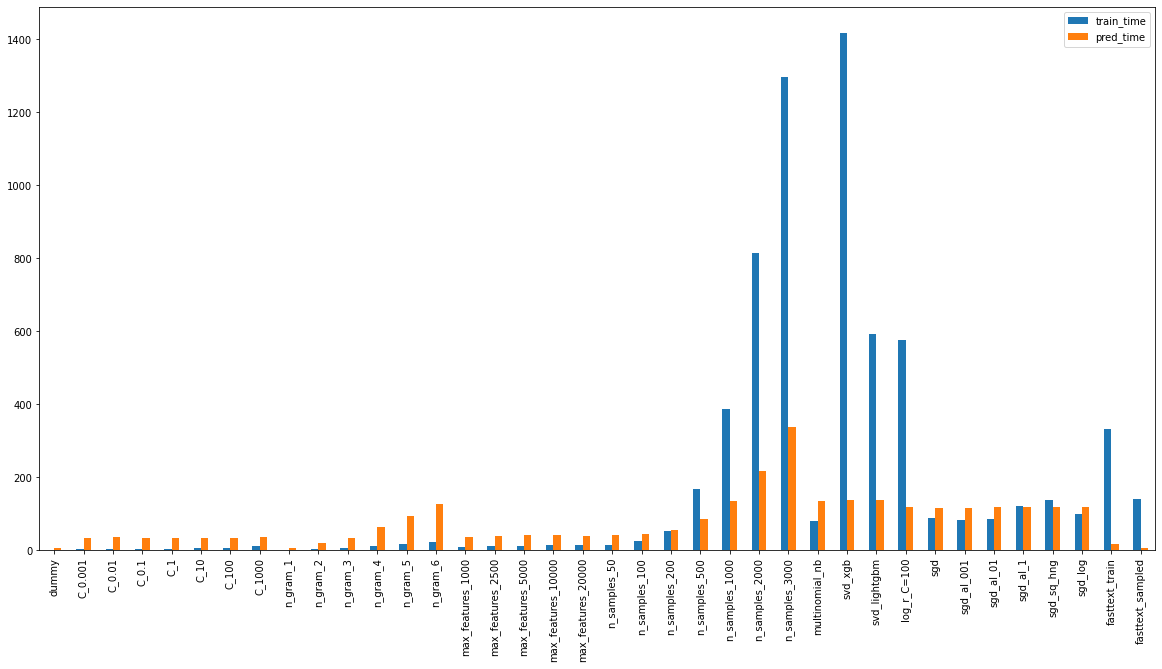

In [104]:
results.transpose()[['train_time',
                     'pred_time']].plot.bar(figsize=(20,10));

## Exercise 21: Next idea


In [78]:
import gensim

In [79]:
import gensim.downloader as api

In [80]:
info = api.info()
info.keys()

dict_keys(['corpora', 'models'])

In [81]:
info['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [82]:
fasttext_model = api.load('fasttext-wiki-news-subwords-300')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



In [83]:
import re

In [84]:
def clean_text_string(s):
  return re.sub(r'[ ]+', ' ',
                re.sub(r'([^a-z0-9])', r' \1 ',
                       re.sub(r'\n|\r',' ', s.lower())))

In [85]:
%timeit clean_text_string("This; asdofij! ")

The slowest run took 50.22 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.84 µs per loop


In [86]:
%timeit clean_text(pd.Series("This; asdofij! ")).values[0]

1000 loops, best of 3: 1.14 ms per loop


In [87]:
def encode_sentence(sent, embed_dim=300):
  tokens = clean_text_string(sent).split()
  vecs = np.zeros((len(tokens), embed_dim))
  for i, t in enumerate(tokens):
    try:
      v = fasttext_model.word_vec(t)
      vecs[i] = v
    except KeyError:
      pass
  return np.mean(vecs, axis=0)

def encode_sentences(sent_array, embed_dim=300):
  res = np.zeros((len(sent_array), embed_dim))
  for i, s in enumerate(sent_array):
    res[i] = encode_sentence(s)
  return res

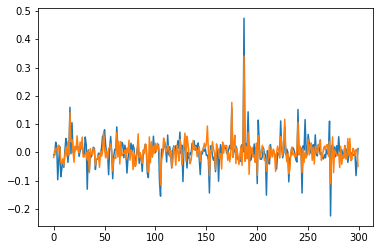

In [88]:
plt.plot(encode_sentence("This is a test"));
plt.plot(encode_sentence("I really like learning new things"));

In [105]:
X_train = encode_sentences(dftrain['value'])
X_sampled = encode_sentences(dfsampled['value'])
X_val = encode_sentences(dftest['value'])

In [106]:
y_train = dftrain['subcatid']
y_sampled = dfsampled['subcatid']
y_val = dftest['subcatid']

In [107]:
results['lgbm_on_fasttext_sampled'] = \
  train_val_model(LGBMClassifier(), 
                  'lgbm_on_fasttext_sampled',
                  X_sampled, y_sampled,
                  X_val, y_val)

In [108]:
results['lgbm_on_fasttext_train'] = \
  train_val_model(LGBMClassifier(), 
                  'lgbm_on_fasttext_train',
                  X_train, y_train,
                  X_val, y_val)

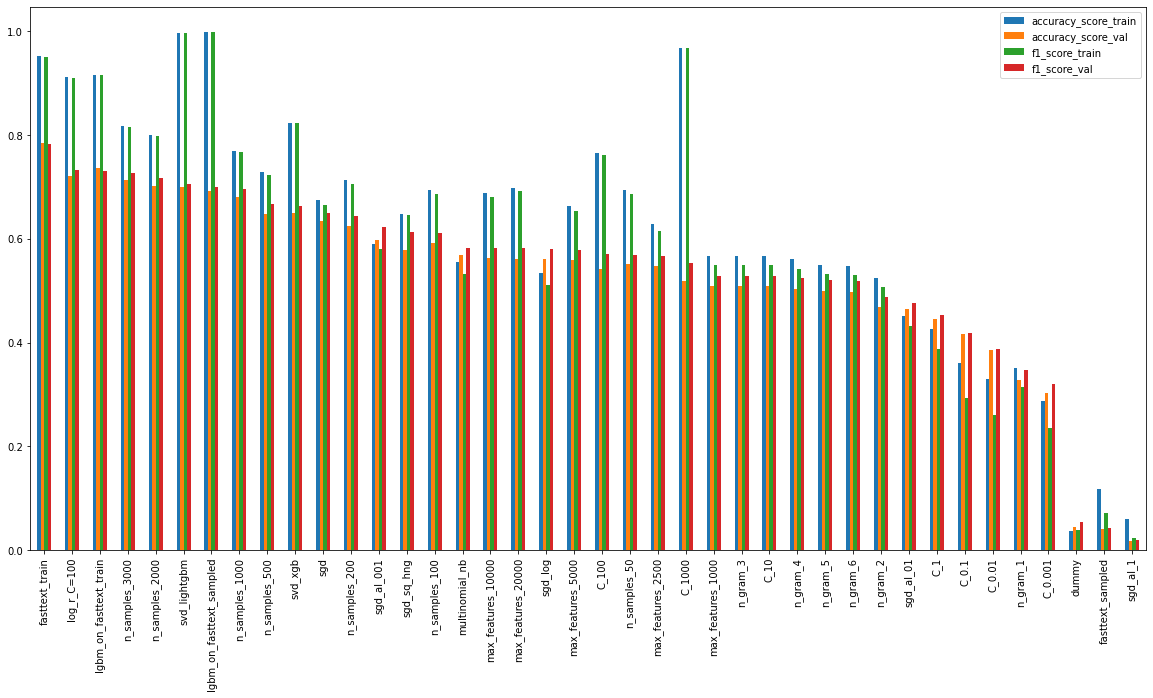

In [111]:
results.transpose()[['accuracy_score_train',
                     'accuracy_score_val',
                     'f1_score_train', 
                     'f1_score_val']]\
                     .sort_values('f1_score_val', ascending=False)\
                     .plot.bar(figsize=(20,10));

## Conclusion and Next steps

- Is your model good enough?
- Can you deploy it?
- What other things should you consider?
- What are your next steps?